# Support Vector Machines

*Support Vector Machine* (SVM) is a powerful and versatil Machine Learning model, capable of performing linear and non-linear classification, regression and eve oitlier detection


## Linear SVM classification
For a better explanation of what SVM classification is about we are going to play again with the *Iris Flower* data set

In [1]:
#Let's set up our enviroment

import numpy as np
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
import sklearn

from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2,3)] # petal length and petal witdh 
y = iris ['target']

setosa_or_versicolor = (y ==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


#SVM Classifier model

svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X,y)


SVC(C=inf, kernel='linear')

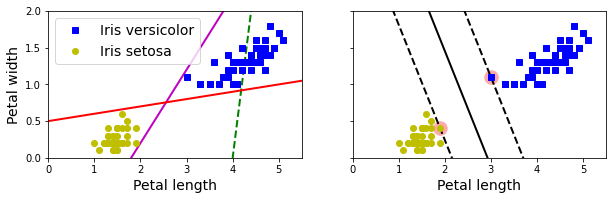

In [2]:
# Bad Models
x0 = np.linspace(0, 5.5, 200) #here in we are generating linear models with god to bad predictios
pred_1 = 5*x0 - 20
pred_2 = x0 -1.8
pred_3 =0.1*x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

In the left figure, two of the models are able to satisfyingly classify both populations and the third performs poorly. However all three models are sensitive to small variations for the classification, eg. small petals for *versicolor* with a large petal witdh will be classified as *setosa* despite it is not.

In contrast the SVM model in the right not only separates the two classes but also stays as far away from the closest training instances as possible. It has a *large margin of classification*


> Note: SVMs are sensitive to the feature scales. It is highly recomended to scale the features e.g., ```Sklearn StandardScaler```


## Soft Margin Classification

If we impose that all instances must be off the street, this is called *hard margin classification*. It has two issues:
- It only works with linearly separable data.
- It is sensitive to ourliers

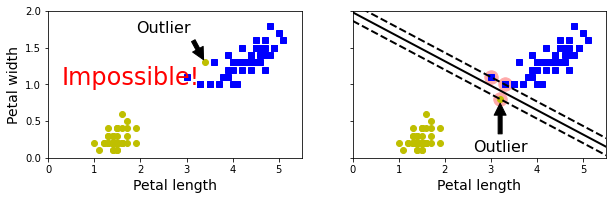

In [3]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

To avoid this issues, it is necesary to use a more flexible model.

When creating a SVM model using Scikit-Learn we can specify a number or hyperparameters. 

THe hyperparameter ```C``` is a regularization parameter. The strength of the regularization is inversively proportional to ```C```

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

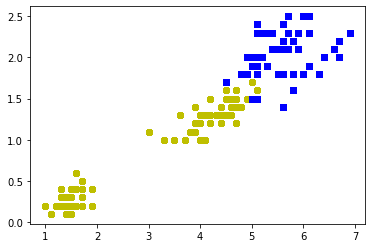

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C = 1, loss = 'hinge'))
])


iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)

svm_clf.fit(X,y)
iris_pred = svm_clf.predict(X)

X[0,0]
for i in range(len(iris_pred)):
    predict = svm_clf.predict([X[i,:]])
    
    if predict == 1:
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    else:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")



Instead of using the ```LinearSVC``` class we could use the ```SVC``` class with a linear kernel.

> ```SVC(kernel = 'linear', C=1)```

Or we could use the ```SGDClassifier``` class with.
> ```SGDClassifier(loss = 'hinge', alpha = 1/m*c)```

This applies Stoschastic Gradient Descent to train linear SVM classifier. It does not converge as fast as the ```LinearSVC``` but it can be useful to handle online classification tasks or huge datasets that do not fit in memory

## Nonlinear SVM classification

When a data set is not linearly separable, one approach is to add more features, such as polinomyal features

E.g.: 
    $\displaystyle x_2 = (x_1)^2$

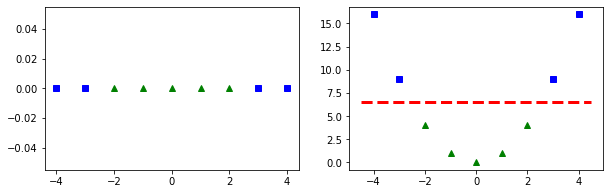

In [51]:
X1D = np.linspace(-4, 4, 9).reshape(-1,1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0, ])

plt.figure(figsize=(10,3))

plt.subplot(121)
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")

plt.subplot(122)
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")

plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)


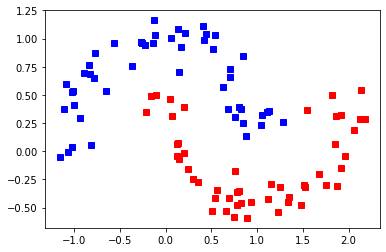

In [61]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise = 0.15)

plt.plot(X[:,0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:,0][y==1], X[:, 1][y==1], 'rs')
plt.show()

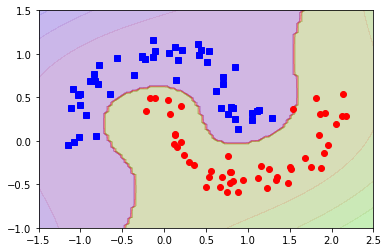

In [68]:
 polynomial_svm_clf = Pipeline([
    ('Poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss = 'hinge'))
])

polynomial_svm_clf.fit(X, y)


def plot_predictions(clf, axes):
    x0s =np.linspace(axes[0], axes[1], 100)
    x1s =np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.plot(X[:,0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:,0][y==1], X[:, 1][y==1], 'ro')    
plt.show()

## Polynomial Kernel
When using SVMs you can apply a mathematical technique called the *kernel trick*. The kernel trick makes it possible to get the same results as if you have added many polynomial features, even with very high-degree polynomials, without actyally having to add them. Avoiding the combinatorial explosion of the number of features.


In this case we use the ```coef0``` as a hyperparameter that controls how much the model is influenced by high-degree polynomyals versus low-degree polynomials

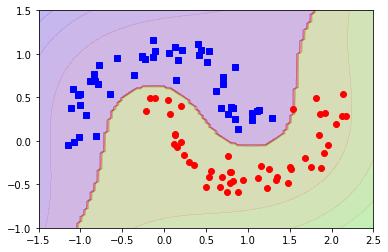

In [71]:
    poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'poly', degree =3, coef0 =1, C=5))
])
poly_kernel_svm_clf.fit(X,y)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.plot(X[:,0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:,0][y==1], X[:, 1][y==1], 'ro')    
plt.show()

## Similaraty Features

Another technique to tackle nonlinear problems is to add features computed by a *similarity function*, which measures how much each instances resembles a particular *landmark*

In this case we are going to use the *Gaussian Radial Basis Function* (RBF) with $\gamma =0.3$

>Equation for the Gaussian RBF
    
> $\displaystyle \phi_{\gamma} (x,l) = exp(- \gamma ||x-l||^2)$

- Where $l$ is the landmark and
- $x$  is the value to compare 

This similarity funtion is a bell shape function that varies from 0 (very different or very far away from the landmark) to 1 (the same landmak).

e.g.
$x_1 =-1$ will be our landmark, and we want to compute the value for elements at a distance 1 and 2
- Distance 1: $\displaystyle \phi_{\gamma}(x, l) = exp(- 0.3·1^2) = 0.74$
- Distance 2: $\displaystyle \phi_{\gamma}(x, l) = exp(- 0.3·2^2) = 0.30$


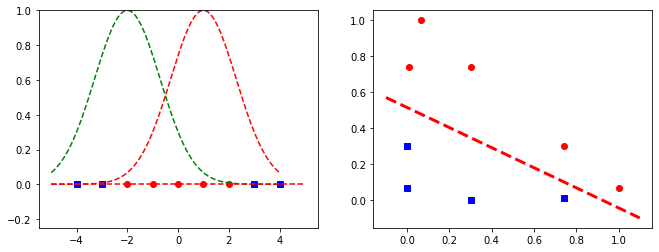

In [102]:
#Here in we create our non-linealy separable data set
x01 = np.linspace(-4,4,9).reshape(-1,1)
y01 = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])


#defining the gamma parameter
gamma =0.3
#defining our first landmark
landmark1 = -2
#to have a better shaped curve we are using a 200 linear spaced np array
x01s = np.linspace(-5,4,200).reshape(-1,1)
x02s = np.exp(-gamma*np.linalg.norm(x01s -landmark1, axis =1)**2)
x02 = np.exp(-gamma*np.linalg.norm(x01 -landmark1, axis =1)**2)

#repeat with our second landmark
landmark2 = 1
x03s = np.exp(-gamma*np.linalg.norm(x01s -landmark2, axis =1)**2)
x03 = np.exp(-gamma*np.linalg.norm(x01 -landmark2, axis =1)**2)


plt.figure(figsize= (11, 4))
plt.subplot(121)
plt.plot(x01[y01==0], np.zeros(9)[y01==0], 'bs')
plt.plot(x01[y01==1], np.zeros(9)[y01==1], 'ro')  
plt.plot(x01s, x02s, 'g--')
plt.plot(x01s, x03s, 'r--')
plt.plot([-5,5], [0,0], 'r--')
plt.ylim(-0.25, 1)

plt.subplot(122)
plt.plot(x02[y01==0], x03[y01==0], 'bs')
plt.plot(x02[y01==1], x03[y01==1], 'ro')  
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)


The simplest way to apply the RBF similarity function is to crete a landmark at the location of each and every instances in the dataset. Doing that creates many dimesions and thus increases the chances taht the transforme training set will be linearly separable. 

Downside: with a data set with *m* instance you get a *m* data set with *m* features

## Gaussian RBF kernel

Despite the utii¡lity of the similarity features, it may be computationally expensive to compute all the additional features, especially on large training sets.


Again the *kernel trick* does it work here. 

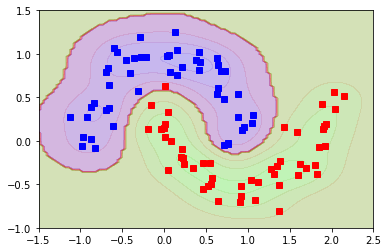

In [104]:
X, y = make_moons(n_samples=100, noise = 0.15)

plt.plot(X[:,0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:,0][y==1], X[:, 1][y==1], 'rs')



rbf_kernel_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma =5, C = 0.0001))
])
rbf_kernel_clf.fit(X,y)
plot_predictions(rbf_kernel_clf, [-1.5, 2.5, -1, 1.5])
plt.show()